sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
wide_deep_model (WideDeepMod multiple                  1239      
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________
Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 101us/sample - loss: 1.3799 - val_loss: 0.5144
Epoch 2/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4411 - val_loss: 0.4418
Epoch 3/10
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4170 - val_loss: 0.4039
Epoch 4/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3831 - val_loss: 0.3914
Epoch 5/10
11610/11610 [==============================] - 1s 43us/sample - loss: 0.3726 - val_

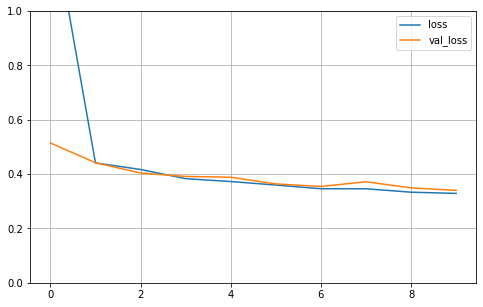

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.38218666130258133

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
#print(tf.__verison__)
print(sys.version_info)
#for module in mpl, np, pd, sklearn, tf, keras:
 #   print(module.__name__,module.__version__)

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data,housing.target,random_state=7)
x_train, x_valid, y_train,y_valid = train_test_split(x_train_all,y_train_all,random_state=11)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

#函数式API 功能API实现模型
# input = keras.layers.Input(shape=x_train.shape[1:])
# hidden1 = keras.layers.Dense(30,activation='sigmoid')(input)
# hidden2 = keras.layers.Dense(30,activation='sigmoid')(hidden1)

# concat = keras.layers.concatenate([input,hidden2])
# output = keras.layers.Dense(1)(concat)

# model = keras.models.Model(inputs=[input],outputs=[output])
#子类api 实现模型
input = keras.layers.Input(shape=x_train.shape[1:])
class WideDeepModel(keras.models.Model):
    def __init__(self):
        super(WideDeepModel,self).__init__()
        #定义模型的层次
        self.hidden1_layer = keras.layers.Dense(30,activation="relu")
        self.hidden2_layer = keras.layers.Dense(30,activation="relu")
        self.output_layer = keras.layers.Dense(1)
        
    def call(self,input):
        #完成模型的的正向运算
        hidden1 = self.hidden1_layer(input)
        hidden2 = self.hidden2_layer(hidden1)
        concat = keras.layers.concatenate([input,hidden2])
        output = self.output_layer(concat)
        return output

    
model = keras.models.Sequential([
    WideDeepModel(),
])
            
            
# model = WideDeepModel()
model.build(input_shape=(None,8))
model.summary()
model.compile(loss = "mean_squared_error",optimizer='adam')
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]

history = model.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),epochs=10,callbacks=callbacks)

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

model.evaluate(x_test_scaled,y_test)

In [ ]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
#print(tf.__verison__)
print(sys.version_info)
#for module in mpl, np, pd, sklearn, tf, keras:
 #   print(module.__name__,module.__version__)

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data,housing.target,random_state=7)
x_train, x_valid, y_train,y_valid = train_test_split(x_train_all,y_train_all,random_state=11)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

#子类API
input = keras.layers.Input(shape=x_train.shape[1:])
class WideDeepModel(keras.models.Model):
    def __init__(self):
        super(WideDeepModel,self).__init__()
        self.hidden1_layer = keras.layers.Dense(30,activation='sigmoid')
        self.hidden2_layer = keras.layers.Dense(30,activation='sigmoid')
        self.output_layer = keras.layers.Dense(1)

    def call(self,input):
        #完成模型的正向计算
        hidden1 = self.hidden1_layer(input)
        hidden2 = self.hidden2_layer(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return  output
model = keras.models.Sequential([
    WideDeepModel(),
])
model.build(input_shape=(None,8))
model.summary()
model.compile(loss = "mean_squared_error",optimizer='adam')
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]

history = model.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),epochs=10,callbacks=callbacks)

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

model.evaluate(x_test_scaled,y_test)